In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
# Load the dataset
df = pd.read_csv('../healthcare_dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
# Filtering and handling missing values
df = df.drop(columns=['id'])
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# Encoding categorical values
df_categorical = df.select_dtypes(exclude=['number']).columns.tolist()

encoder = LabelEncoder()
for col in df_categorical:
    df[col] = encoder.fit_transform(df[col])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [17]:
# Defining features and target variables
x = df.drop(columns=['stroke'])
y = df['stroke']

In [18]:
# Standardizing the featues (PCA is sensitive to scale)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  2.70637544,
         1.00508597, -0.35178071],
       [-0.840344  ,  0.78607007, -0.32860186, ...,  2.12155854,
        -0.09898092,  0.58155233],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.47253605,  0.58155233],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -0.51144264,
         0.22574463,  0.58155233],
       [ 1.18807255,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.42370648, -0.35178071],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.46086746,
        -0.34577235, -1.28511375]])

In [23]:
# Applying PCA
pca = PCA(n_components=x.shape[1])
x_pca = pca.fit_transform(x_scaled)
x_pca

array([[ 2.45616988,  3.66830321, -1.37236345, ...,  1.13967276,
         0.09222453, -0.36801344],
       [ 0.9910437 ,  0.51512611,  1.04768171, ..., -1.34654886,
        -0.85054787,  0.10982598],
       [ 2.21891813,  2.39309309,  0.47443152, ...,  1.25517169,
        -0.48257418,  0.21578992],
       ...,
       [-0.07574418, -0.79666146,  1.02772473, ..., -0.04362103,
        -1.16789965, -0.58983661],
       [ 0.45201898,  1.01488271,  0.96487558, ..., -1.15751141,
         0.18858815, -0.19362708],
       [ 0.37072203, -1.20004815, -1.00428328, ...,  0.01909349,
         1.83590611, -0.49973144]])

In [25]:
# Explaining the variance ratio
exp_var = pca.explained_variance_ratio_
exp_var

array([0.26151469, 0.12583665, 0.10014499, 0.09491779, 0.09048394,
       0.08332168, 0.08089529, 0.0706151 , 0.06304975, 0.02922013])

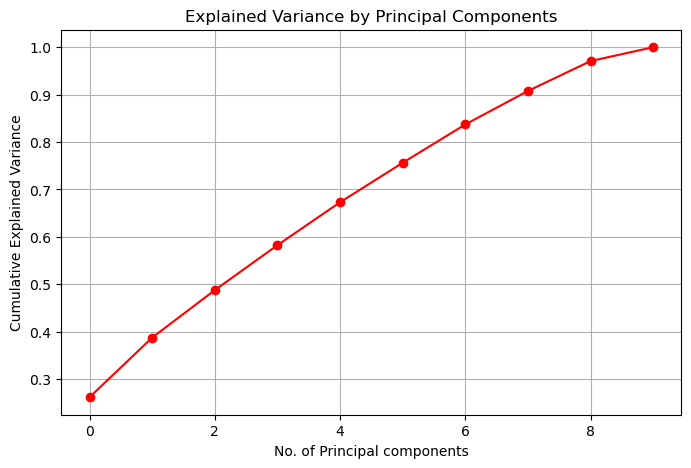

In [28]:
# Plotting the cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(exp_var), marker='o', color='r')
plt.xlabel('No. of Principal components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

In [33]:
# Choosing the no. of components that explains at least 95% of the variance
cum_var = np.cumsum(exp_var)
comp = np.argmax(cum_var >= 0.95) + 1
print(f'No. of components explaining 95% variance: {comp}')

No. of components explaining 95% variance: 9


In [34]:
# Reducing the dim with chosen no. of components
pca_final = PCA(n_components=comp)
x_pca_final = pca_final.fit_transform(x_scaled)
x_pca_final

array([[ 2.45616988,  3.66830321, -1.37236345, ...,  1.13271824,
         1.13967276,  0.09222453],
       [ 0.9910437 ,  0.51512611,  1.04768171, ...,  0.65297938,
        -1.34654886, -0.85054787],
       [ 2.21891813,  2.39309309,  0.47443152, ...,  0.5960715 ,
         1.25517169, -0.48257418],
       ...,
       [-0.07574418, -0.79666146,  1.02772473, ..., -0.01696859,
        -0.04362103, -1.16789965],
       [ 0.45201898,  1.01488271,  0.96487558, ..., -0.21437145,
        -1.15751141,  0.18858815],
       [ 0.37072203, -1.20004815, -1.00428328, ..., -1.19403738,
         0.01909349,  1.83590611]])

In [36]:
# Convert to dataframe to analyze it further
df_pca = pd.DataFrame(x_pca_final, columns=[f'PC{i+1}' for i in range(comp)])
df_pca['stroke'] = y
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,stroke
0,2.456170,3.668303,-1.372363,-0.846573,-1.552876,-1.699250,1.132718,1.139673,0.092225,1
1,0.991044,0.515126,1.047682,1.083468,-0.235669,-1.388511,0.652979,-1.346549,-0.850548,1
2,2.218918,2.393093,0.474432,-1.838470,-2.678172,0.427304,0.596071,1.255172,-0.482574,1
3,1.504857,-0.610710,-0.869603,0.710532,0.319549,-0.902237,1.288253,-0.536455,-0.696968,1
4,1.879402,1.466354,1.219636,2.526505,0.463194,1.248927,-0.208410,-1.470036,-0.071322,1
